In [2]:
import pandas as pd

## 1. reading data

In [9]:
desc = pd.read_csv("../Data/cleaned_desc.csv", error_bad_lines=False, index_col=0)

C:\Users\elaaf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
desc.head()

,steam_appid,detailed_description,genres
0,10,Play the world's number 1 online action game. ...,Action
1,20,One of the most popular online action games of...,Action
2,30,Enlist in an intense brand of Axis vs. Allied ...,Action
3,40,Enjoy fast-paced multiplayer gaming with Death...,Action
4,50,Return to the Black Mesa Research Facility as ...,Action


In [14]:
data_text = desc[['detailed_description']]
data_text['index'] = data_text.index
documents = data_text

C:\Users\elaaf\AppData\Local\Temp/ipykernel_28948/4054479692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [15]:
documents

,detailed_description,index
0,Play the world's number 1 online action game. ...,0
1,One of the most popular online action games of...,1
2,Enlist in an intense brand of Axis vs. Allied ...,2
3,Enjoy fast-paced multiplayer gaming with Death...,3
4,Return to the Black Mesa Research Facility as ...,4
...,...,...
26817,"<img src=""https://steamcdn-a.akamaihd.net/stea...",26817
26818,Have you ever been so lonely that no one but y...,26818
26819,<strong>Super Star Blast </strong>is a space b...,26819
26820,Pursue a snow-white deer through an enchanted ...,26820


## 2. reading data

In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

C:\Users\elaaf\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elaaf\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [66]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [26]:
stemmer = SnowballStemmer('english')
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['<img', 'src="https://steamcdn-a.akamaihd.net/steam/apps/337480/extras/steamminibanner2.png?t=1458564729"', '><br><br>From', 'the', 'creators', 'of', 'indie', 'smash', 'hit', 'Stick', 'It', 'to', 'The', 'Man!', 'comes', 'a', 'new', 'one', 'to', 'four-player', 'co-op', 'stab-you-in-the-gut-a-thon.', 'Embark', 'on', 'a', 'dead', 'funny', 'adventure', 'with', 'the', 'Zombie', 'Vikings.', 'A', 'putrid', 'posse', 'sent', 'on', 'a', 'mission', 'through', 'the', 'most', 'epic', 'of', 'worlds', 'to', 'retrieve', 'Odin’s', 'lost', 'eye.<br>', '<br>Play', 'as', 'the', 'most', 'fearsome', 'Vikings', 'ever', 'raised', 'from', 'Norse', 'soil', '–', 'Gunborg,', 'Seagurd,', 'Hedgy', 'and', 'Caw-kaa.', 'Hack', 'through', 'the', 'gingerbread', 'swamps', 'of', 'Molgaga!', 'Cruise', 'through', 'the', 'intestines', 'of', 'the', 'Midgaard', 'Serpent!', 'Fight', 'giant', 'poultry!<br><br><img', 'src="https://steamcdn-a.akamaihd.net/steam/apps/337480/extras/steamminibanner_keyfeatures.pn

In [28]:
processed_docs = documents['detailed_description'].map(preprocess)

In [29]:
processed_docs[:10]

0    [play, world, number, onlin, action, game, eng...
1    [popular, onlin, action, game, time, team, for...
2    [enlist, intens, brand, axi, alli, teamplay, w...
3    [enjoy, fast, pace, multiplay, game, deathmatc...
4    [return, black, mesa, research, facil, militar...
5    [futurist, action, game, challeng, agil, ricoc...
6    [name, game, year, public, valv, debut, titl, ...
7    [extens, tour, duti, campaign, near, limitless...
8    [gearbox, softwar, origin, releas, half, life,...
9    [half, life, send, shock, game, industri, comb...
Name: detailed_description, dtype: object

In [30]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [47]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 action
1 affect
2 alli
3 base
4 brand
5 complet
6 enemi
7 engag
8 hostag
9 incred
10 mission


In [32]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [33]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(10, 1),
 (12, 1),
 (13, 2),
 (26, 2),
 (27, 1),
 (40, 1),
 (42, 1),
 (44, 1),
 (61, 2),
 (69, 1),
 (71, 1),
 (112, 1),
 (117, 1),
 (124, 1),
 (143, 1),
 (238, 1),
 (244, 1),
 (278, 1),
 (291, 1),
 (299, 1),
 (393, 1),
 (405, 1),
 (429, 1),
 (433, 1),
 (434, 1),
 (442, 1),
 (497, 1),
 (499, 3),
 (514, 2),
 (519, 1),
 (529, 1),
 (542, 1),
 (629, 1),
 (645, 1),
 (687, 1),
 (934, 1),
 (1024, 1),
 (1449, 1),
 (1478, 1),
 (1629, 1),
 (1670, 1),
 (1828, 2),
 (2276, 1),
 (2458, 1),
 (2609, 1),
 (2652, 1),
 (2734, 1),
 (2757, 1),
 (2871, 1),
 (3191, 1),
 (3287, 1),
 (3407, 1),
 (4123, 1),
 (4300, 1),
 (4364, 1),
 (4568, 4),
 (5714, 1),
 (6102, 1),
 (6117, 1),
 (6762, 1)]

In [34]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 10 ("mission") appears 1 time.
Word 12 ("onlin") appears 1 time.
Word 13 ("play") appears 2 time.
Word 26 ("world") appears 2 time.
Word 27 ("abil") appears 1 time.
Word 40 ("style") appears 1 time.
Word 42 ("uniqu") appears 1 time.
Word 44 ("weapon") appears 1 time.
Word 61 ("player") appears 2 time.
Word 69 ("work") appears 1 time.
Word 71 ("collect") appears 1 time.
Word 112 ("arena") appears 1 time.
Word 117 ("adventur") appears 1 time.
Word 124 ("friend") appears 1 time.
Word 143 ("plus") appears 1 time.
Word 238 ("send") appears 1 time.
Word 244 ("stori") appears 1 time.
Word 278 ("power") appears 1 time.
Word 291 ("lose") appears 1 time.
Word 299 ("run") appears 1 time.
Word 393 ("offlin") appears 1 time.
Word 405 ("smash") appears 1 time.
Word 429 ("come") appears 1 time.
Word 433 ("creator") appears 1 time.
Word 434 ("dead") appears 1 time.
Word 442 ("epic") appears 1 time.
Word 497 ("versus") appears 1 time.
Word 499 ("zombi") appears 3 time.
Word 514 ("differ") appears 

In [48]:
documents['detailed_description'].head()

0    Play the world's number 1 online action game. ...
1    One of the most popular online action games of...
2    Enlist in an intense brand of Axis vs. Allied ...
3    Enjoy fast-paced multiplayer gaming with Death...
4    Return to the Black Mesa Research Facility as ...
Name: detailed_description, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   tokenizer=preprocess,
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(documents['detailed_description'])

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

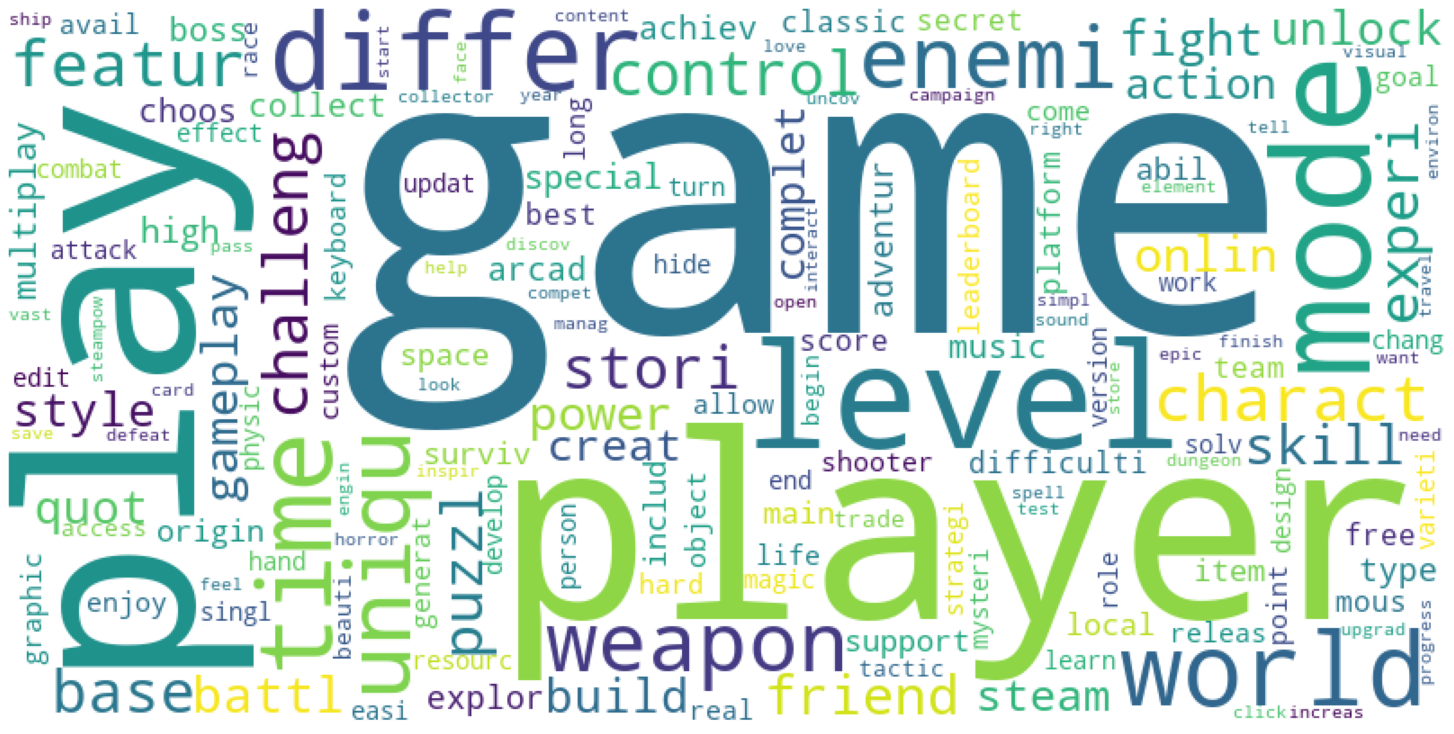

In [70]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 10).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

## TF-IDF

In [35]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)


corpus_tfidf = tfidf[bow_corpus]


from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break



[(0, 0.07838336772238169),
 (1, 0.34036623419139617),
 (2, 0.17245973381720425),
 (3, 0.07634864751232119),
 (4, 0.1732011546769606),
 (5, 0.08571469614914848),
 (6, 0.06586193875010607),
 (7, 0.15397504820295874),
 (8, 0.2787550718736505),
 (9, 0.1670643536538849),
 (10, 0.11020450861419895),
 (11, 0.13569984853446784),
 (12, 0.11440150432823021),
 (13, 0.040087099954342294),
 (14, 0.17838319105669365),
 (15, 0.14535055256531762),
 (16, 0.17510519924946755),
 (17, 0.2683152776961214),
 (18, 0.21513115903667773),
 (19, 0.15131271842330699),
 (20, 0.30358697534227963),
 (21, 0.3255230508080199),
 (22, 0.24444270653266553),
 (23, 0.25778300979315766),
 (24, 0.21133473117101959),
 (25, 0.174271036038126),
 (26, 0.04503311134905346)]


In [38]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [39]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"level" + 0.013*"play" + 0.011*"player" + 0.010*"mode" + 0.009*"control" + 0.009*"time" + 0.008*"quot" + 0.008*"featur" + 0.007*"challeng" + 0.006*"differ"
Topic: 1 
Words: 0.011*"enemi" + 0.010*"battl" + 0.007*"world" + 0.006*"fight" + 0.006*"weapon" + 0.006*"power" + 0.006*"player" + 0.006*"time" + 0.006*"featur" + 0.005*"differ"
Topic: 2 
Words: 0.014*"quot" + 0.009*"stori" + 0.008*"world" + 0.007*"play" + 0.007*"time" + 0.006*"charact" + 0.005*"like" + 0.005*"differ" + 0.005*"adventur" + 0.005*"build"
Topic: 3 
Words: 0.015*"puzzl" + 0.011*"world" + 0.009*"level" + 0.009*"quot" + 0.006*"explor" + 0.006*"time" + 0.006*"solv" + 0.006*"stori" + 0.005*"mysteri" + 0.005*"featur"
Topic: 4 
Words: 0.017*"player" + 0.011*"play" + 0.010*"enemi" + 0.010*"weapon" + 0.009*"mode" + 0.008*"world" + 0.008*"differ" + 0.007*"fight" + 0.007*"build" + 0.007*"charact"


In [40]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [41]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.003*"quot" + 0.003*"puzzl" + 0.003*"level" + 0.002*"adventur" + 0.002*"world" + 0.002*"monster" + 0.002*"charact" + 0.002*"stori" + 0.002*"player" + 0.002*"zombi"
Topic: 1 Word: 0.005*"puzzl" + 0.005*"quot" + 0.004*"level" + 0.003*"girl" + 0.003*"maze" + 0.002*"music" + 0.002*"adventur" + 0.002*"world" + 0.002*"steampow" + 0.002*"beauti"
Topic: 2 Word: 0.004*"quot" + 0.004*"stori" + 0.003*"puzzl" + 0.003*"world" + 0.003*"adventur" + 0.002*"charact" + 0.002*"mysteri" + 0.002*"explor" + 0.002*"level" + 0.002*"surviv"
Topic: 3 Word: 0.004*"quot" + 0.003*"enemi" + 0.002*"weapon" + 0.002*"world" + 0.002*"player" + 0.002*"build" + 0.002*"level" + 0.002*"differ" + 0.002*"battl" + 0.002*"ship"
Topic: 4 Word: 0.005*"level" + 0.004*"quot" + 0.004*"mode" + 0.003*"puzzl" + 0.003*"player" + 0.003*"race" + 0.003*"control" + 0.003*"play" + 0.003*"challeng" + 0.002*"ball"
Topic: 5 Word: 0.004*"quot" + 0.002*"adventur" + 0.002*"world" + 0.002*"stori" + 0.002*"puzzl" + 0.002*"explor" + 

In [42]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5619043707847595	 
Topic: 0.017*"player" + 0.011*"play" + 0.010*"enemi" + 0.010*"weapon" + 0.009*"mode" + 0.008*"world" + 0.008*"differ" + 0.007*"fight" + 0.007*"build" + 0.007*"charact"

Score: 0.3738948404788971	 
Topic: 0.011*"enemi" + 0.010*"battl" + 0.007*"world" + 0.006*"fight" + 0.006*"weapon" + 0.006*"power" + 0.006*"player" + 0.006*"time" + 0.006*"featur" + 0.005*"differ"

Score: 0.05728347972035408	 
Topic: 0.015*"puzzl" + 0.011*"world" + 0.009*"level" + 0.009*"quot" + 0.006*"explor" + 0.006*"time" + 0.006*"solv" + 0.006*"stori" + 0.005*"mysteri" + 0.005*"featur"


In [43]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7595725655555725	 
Topic: 0.003*"quot" + 0.003*"puzzl" + 0.003*"level" + 0.002*"adventur" + 0.002*"world" + 0.002*"monster" + 0.002*"charact" + 0.002*"stori" + 0.002*"player" + 0.002*"zombi"

Score: 0.1606830656528473	 
Topic: 0.004*"quot" + 0.003*"enemi" + 0.002*"weapon" + 0.002*"world" + 0.002*"player" + 0.002*"build" + 0.002*"level" + 0.002*"differ" + 0.002*"battl" + 0.002*"ship"

Score: 0.06987184286117554	 
Topic: 0.003*"quot" + 0.002*"world" + 0.002*"poker" + 0.002*"level" + 0.002*"play" + 0.002*"player" + 0.002*"adventur" + 0.002*"puzzl" + 0.002*"charact" + 0.002*"time"


In [45]:


unseen_document = '"About This Game Fight your way through an exciting action-adventure game, inspired by classic dungeon crawlers and set in the Minecraft universe! Brave the dungeons alone, or team up with friends! Up to four players can battle together through action-packed, treasure-stuffed, wildly varied levels – all in an epic quest to save the villagers and take down the evil Arch-Illager! Power Up! Unlock over 250 unique artifacts, gear, and enchantments to perform and survive devastating special attacks. Multiplayer! Up to four players can team up and fight together in co-op mode. Options! Personalize your character, then fight up-close and personal with melee swings, hang back with ranged attacks, or tank your way through swarms of mobs, shielded by heavy armour! Epicness! Explore treasure-stuffed levels in a quest to take down the evil Arch-Illager!"'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))



Score: 0.7958611845970154	 Topic: 0.017*"player" + 0.011*"play" + 0.010*"enemi" + 0.010*"weapon" + 0.009*"mode"
Score: 0.19551105797290802	 Topic: 0.011*"enemi" + 0.010*"battl" + 0.007*"world" + 0.006*"fight" + 0.006*"weapon"
